In [2]:
import pandas as pd

df = pd.read_excel(r'C:\Users\Hiteash\Downloads\Marketing Team Data.xlsx')

df.head()

,campaign ID,Campaign Name,Audience,Age,Geography,Reach,Impressions,Frequency,Clicks,Unique Clicks,Unique Link Clicks (ULC),Click-Through Rate (CTR in %),Unique Click-Through Rate (Unique CTR in %),Amount Spent in INR,Cost Per Click (CPC),Cost per Result (CPR),@dropdown,@dropdown.1
0,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,25-34,"Group 1 (Australia, Canada, United Kingdom, Gh...",11387,23283,2.044700,487,406,180,2.091655,3.565469,1092.24,2.242790,6.07,NaN,NaN
1,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,35-44,"Group 1 (Australia, Canada, United Kingdom, Gh...",8761,15683,1.790092,484,376,154,3.086144,4.291748,835.46,1.726165,5.43,NaN,NaN
2,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,45-54,"Group 1 (Australia, Canada, United Kingdom, Gh...",2867,6283,2.191489,198,145,65,3.151361,5.057551,319.38,1.613038,4.91,NaN,NaN
3,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,55-64,"Group 1 (Australia, Canada, United Kingdom, Gh...",889,1890,2.125984,49,40,21,2.592593,4.499438,86.25,1.760117,4.11,NaN,NaN
4,Campaign 2,SHU3_ (Students Apart from India and US),Students,18-24,"Group 2 (Australia, Canada, United Kingdom, Gh...",29675,39161,1.319663,2593,1994,1095,6.621384,6.719461,1193.94,0.460448,1.09,NaN,NaN


## Data Clean

In [3]:
currency_cols = ['Amount Spent in INR', 'Cost Per Click (CPC)', 'Cost per Result (CPR)']

for col in currency_cols:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

print(df.dtypes)
print(df.head())

campaign ID                                     object
Campaign Name                                   object
Audience                                        object
Age                                             object
Geography                                       object
Reach                                            int64
Impressions                                      int64
Frequency                                      float64
Clicks                                           int64
Unique Clicks                                    int64
Unique Link Clicks (ULC)                         int64
Click-Through Rate (CTR in %)                  float64
Unique Click-Through Rate (Unique CTR in %)    float64
Amount Spent in INR                            float64
Cost Per Click (CPC)                           float64
Cost per Result (CPR)                          float64
@dropdown                                      float64
@dropdown.1                                    float64
dtype: obj

## Visualization

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
campaign_col = 'campaign ID'
age_col = 'Age'
clicks_col = 'Clicks'
unique_clicks_col = 'Unique Clicks'
ulc_col = 'Unique Link Clicks (ULC)'

## Horizontal bar graph 

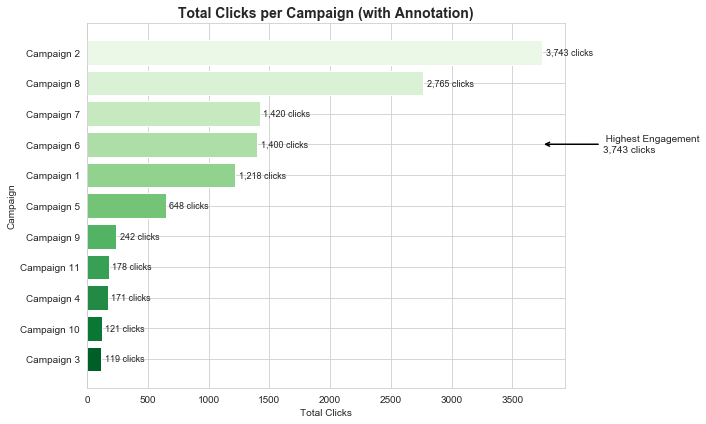

In [6]:
click_summary = df.groupby(campaign_col)[clicks_col].sum().reset_index()
click_summary = click_summary.sort_values(by=clicks_col, ascending=False)
max_idx = click_summary[clicks_col].idxmax()
max_campaign = click_summary.loc[max_idx, campaign_col]
max_clicks = click_summary.loc[max_idx, clicks_col]
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
bar_colors = sns.color_palette("Greens", n_colors=len(click_summary))
bars = plt.barh(click_summary[campaign_col], click_summary[clicks_col], color=bar_colors)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 30, bar.get_y() + bar.get_height()/2,
             f"{int(width):,} clicks", va='center', fontsize=9)

# Annotate the highest engagement campaign
plt.annotate(
    f" Highest Engagement\n{max_clicks:,} clicks",
    xy=(max_clicks, click_summary.index[click_summary[campaign_col] == max_campaign][0]),
    xytext=(max_clicks + 500, click_summary.index[click_summary[campaign_col] == max_campaign][0]),
    arrowprops=dict(arrowstyle="->", lw=1.5, color='black'),
    fontsize=10,
    va='center'
)
plt.title("Total Clicks per Campaign (with Annotation)", fontsize=14, weight='bold')
plt.xlabel("Total Clicks")
plt.ylabel("Campaign")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("Total_Clicks_per_Campaign_Annotated.png", dpi=300)
plt.show()

## Stacked horizontal bar chart

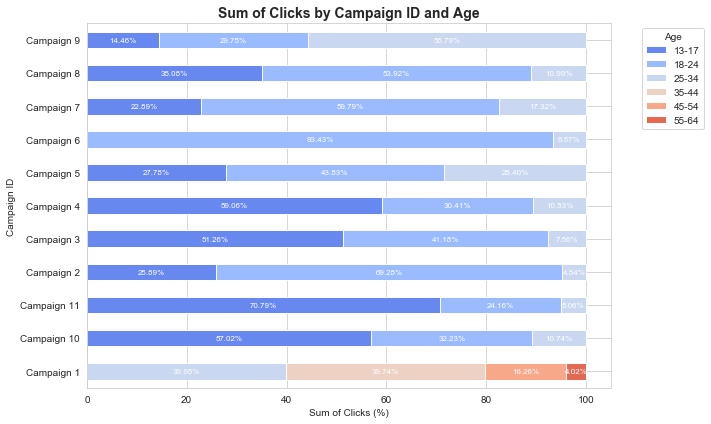

In [7]:
clicks_summary = df.groupby([campaign_col, age_col])[clicks_col].sum().unstack(fill_value=0)
clicks_pct = clicks_summary.div(clicks_summary.sum(axis=1), axis=0) * 100
age_order = ['13-17', '18-24', '25-34', '35-44', '45-54', '55-64']
palette = sns.color_palette("coolwarm", len(age_order))
fig, ax = plt.subplots(figsize=(10, 6))
clicks_pct[age_order].plot(
    kind='barh',
    stacked=True,
    color=palette,
    ax=ax
)
for i, (idx, row) in enumerate(clicks_pct.iterrows()):
    cum_width = 0
    for j, age in enumerate(age_order):
        width = row.get(age, 0)
        if width > 4:  # only label if segment > 4%
            ax.text(cum_width + width/2, i, f"{width:.2f}%", ha='center', va='center', color='white', fontsize=8)
        cum_width += width

ax.set_title("Sum of Clicks by Campaign ID and Age", fontsize=14, weight='bold')
ax.set_xlabel("Sum of Clicks (%)")
ax.set_ylabel("Campaign ID")
ax.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Sum_of_Clicks_by_Campaign_and_Age.png", dpi=300)
plt.show()

## Grouped vertical bar chart

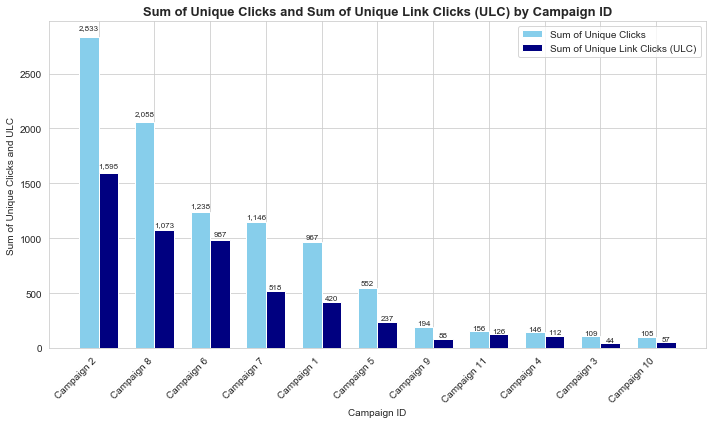

In [8]:
unique_summary = df.groupby(campaign_col)[[unique_clicks_col, ulc_col]].sum().reset_index()
unique_summary = unique_summary.sort_values(by=unique_clicks_col, ascending=False)
x = np.arange(len(unique_summary[campaign_col]))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, unique_summary[unique_clicks_col], width, label='Sum of Unique Clicks', color='skyblue')
bars2 = ax.bar(x + width/2, unique_summary[ulc_col], width, label='Sum of Unique Link Clicks (ULC)', color='navy')
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.02*height, f"{int(height):,}", ha='center', va='bottom', fontsize=8)

ax.set_title("Sum of Unique Clicks and Sum of Unique Link Clicks (ULC) by Campaign ID", fontsize=13, weight='bold')
ax.set_xlabel("Campaign ID")
ax.set_ylabel("Sum of Unique Clicks and ULC")
ax.set_xticks(x)
ax.set_xticklabels(unique_summary[campaign_col], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.savefig("Unique_Clicks_vs_ULC_by_Campaign.png", dpi=300)
plt.show()

## Scatter Plot: CPC vs CTR by Campaign

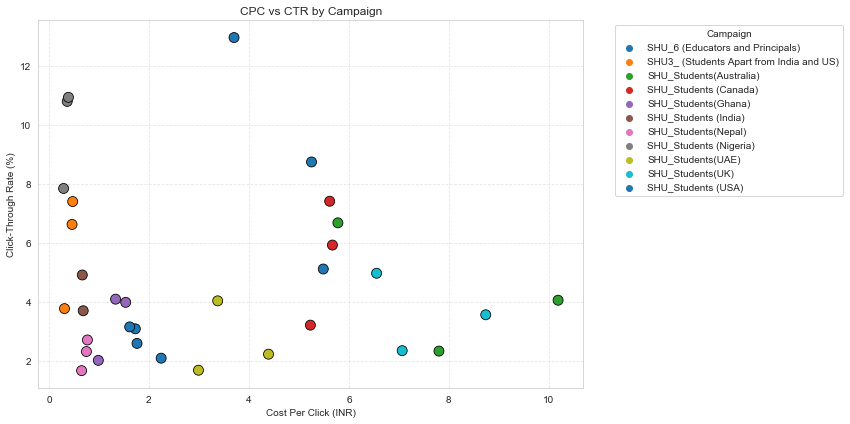

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='Cost Per Click (CPC)',
    y='Click-Through Rate (CTR in %)',
    hue='Campaign Name',
    palette='tab10',
    s=100,
    edgecolor='black'
)
plt.title('CPC vs CTR by Campaign')
plt.xlabel('Cost Per Click (INR)')
plt.ylabel('Click-Through Rate (%)')
plt.legend(title='Campaign', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Heatmap: Reach vs Frequency by Campaign

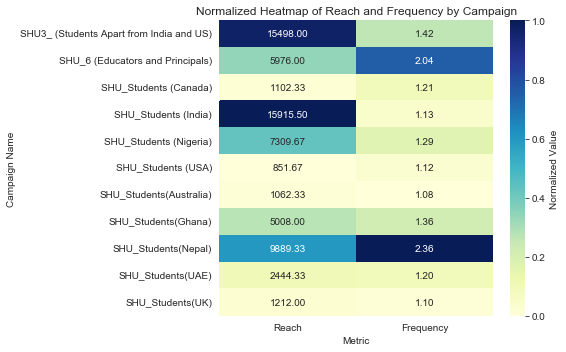

In [10]:
heatmap_data = df.groupby('Campaign Name')[['Reach', 'Frequency']].mean()

heatmap_norm = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_norm, annot=heatmap_data.round(2), fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Normalized Value'})
plt.title('Normalized Heatmap of Reach and Frequency by Campaign')
plt.xlabel('Metric')
plt.ylabel('Campaign Name')
plt.tight_layout()
plt.show()

## Box Plot: Unique CTR by Geography

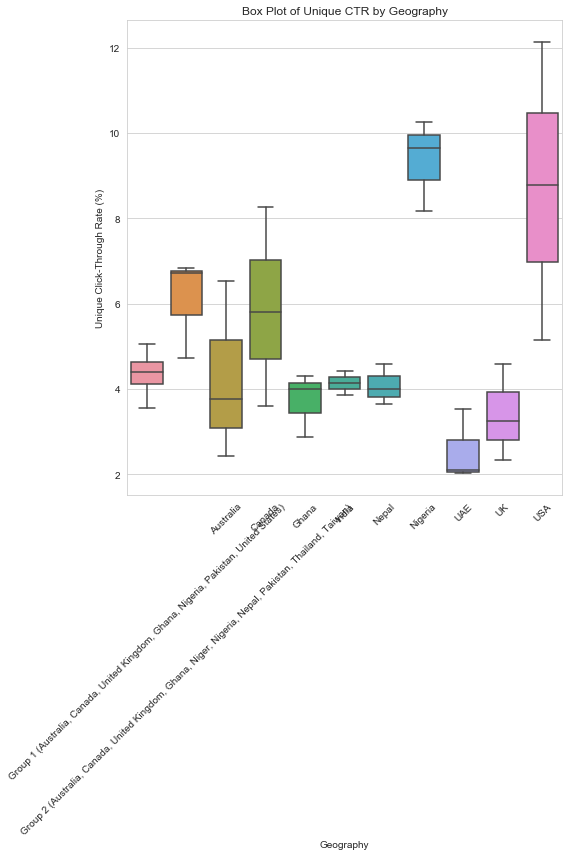

In [11]:
plt.figure(figsize=(8, 12))
sns.boxplot(data=df, x='Geography', y='Unique Click-Through Rate (Unique CTR in %)')
plt.title('Box Plot of Unique CTR by Geography')
plt.xlabel('Geography')
plt.ylabel('Unique Click-Through Rate (%)')
plt.xticks(rotation=45)  # rotate x labels if needed
plt.tight_layout()
plt.show()

## Pie Chart: Proportion of Total Clicks by Audience

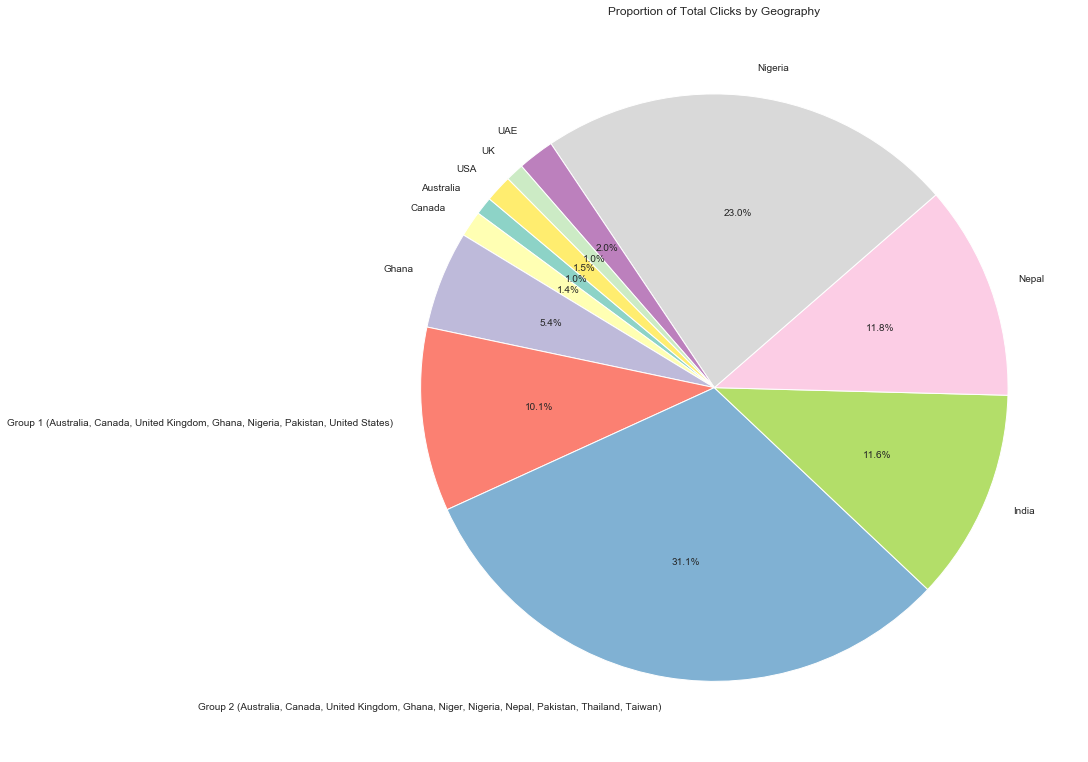

In [12]:
clicks_by_geography = df.groupby('Geography')['Clicks'].sum()

plt.figure(figsize=(15,15))
clicks_by_geography.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Set3', legend=False)
plt.title('Proportion of Total Clicks by Geography')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Bubble Chart: Amount Spent vs Unique Clicks (bubble size = Frequency)

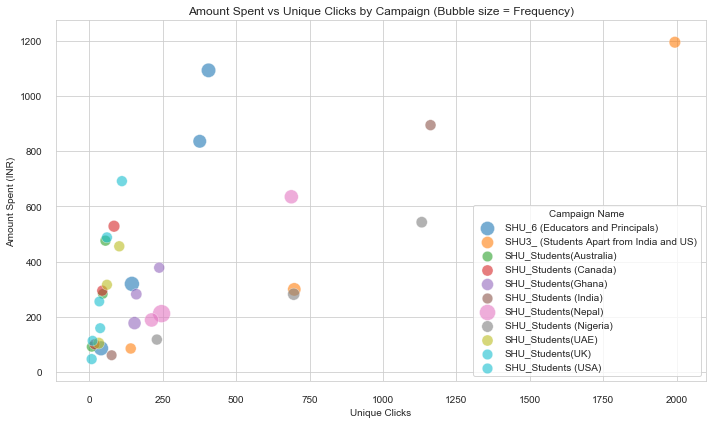

In [13]:
plt.figure(figsize=(10, 6))

campaigns = df['Campaign Name'].unique()
colors = plt.cm.get_cmap('tab10', len(campaigns))

for i, campaign in enumerate(campaigns):
    subset = df[df['Campaign Name'] == campaign]
    plt.scatter(
        subset['Unique Clicks'],
        subset['Amount Spent in INR'],
        s=subset['Frequency'] * 100,  # adjust size scale as needed
        alpha=0.6,
        label=campaign,
        color=colors(i),
        edgecolors='w',
        linewidth=0.5
    )

plt.title('Amount Spent vs Unique Clicks by Campaign (Bubble size = Frequency)')
plt.xlabel('Unique Clicks')
plt.ylabel('Amount Spent (INR)')

plt.tick_params(axis='x', direction='out', pad=10)

plt.tick_params(axis='y', direction='out', pad=10)

plt.legend(title='Campaign Name')
plt.grid(True)
plt.tight_layout()
plt.show()